In [1]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

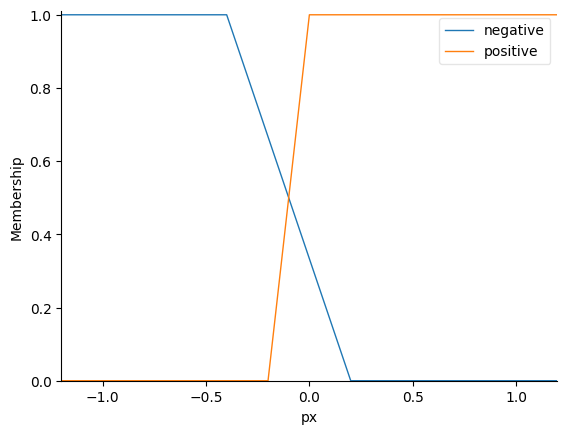

In [13]:
px = ctrl.Antecedent(np.arange(-1.2, 1.2, 0.001), 'px')

px['negative'] = fuzz.trapmf(px.universe, [-1.2, -1.2, -0.4, 0.2])
px['positive'] = fuzz.trapmf(px.universe, [-0.2, 0, 1.2, 1.2])

px.view()

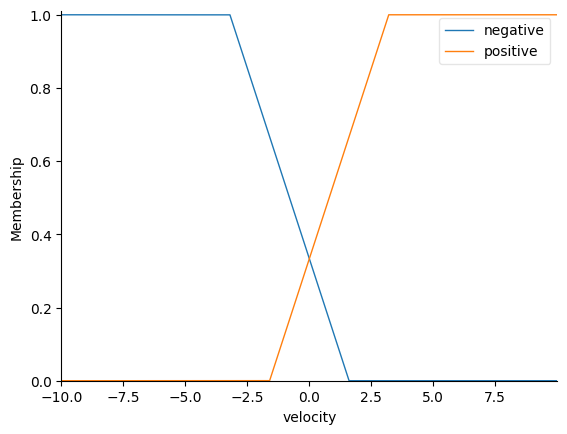

In [24]:
velocity = ctrl.Antecedent(np.arange(-10, 10, 0.001), 'velocity')

velocity['negative'] = fuzz.trapmf(velocity.universe, [-10, -10, -3.2, 1.6])
velocity['positive'] = fuzz.trapmf(velocity.universe, [-1.6, 3.2, 10, 10])

velocity.view()

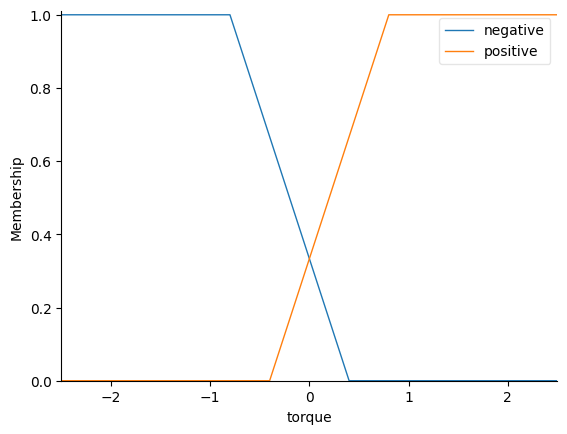

In [25]:
torque = ctrl.Consequent(np.arange(-2.5, 2.5, 0.001), 'torque')

torque['negative'] = fuzz.trapmf(torque.universe, [-2.5, -2.5, -0.8, 0.4])
torque['positive'] = fuzz.trapmf(torque.universe, [-0.4, 0.8, 2.5, 2.5])

torque.view()

In [16]:
rule1 = ctrl.Rule(px['negative'] & velocity['negative'], torque['negative'])
rule2 = ctrl.Rule(px['negative'] & velocity['positive'], torque['positive'])
rule3 = ctrl.Rule(px['positive'] & velocity['positive'], torque['negative'])
rule4 = ctrl.Rule(px['positive'] & velocity['negative'], torque['positive'])

In [17]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [26]:
env = gym.make('Pendulum-v1', g=9.81, render_mode="human")
observation, info = env.reset(seed=42)
rewards = []
for _ in range(500):
    px = observation[0]
    velocity = observation[2]
    
    simulator.input['px'] = px
    simulator.input['velocity'] = velocity
    simulator.compute()
    decision = simulator.output['torque']
    observation, reward, terminated, truncated, info = env.step([decision])
    rewards.append(reward)
    
    if px > 0.99 and abs(velocity) < 1.5:
        terminated = True
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 73 iteration!


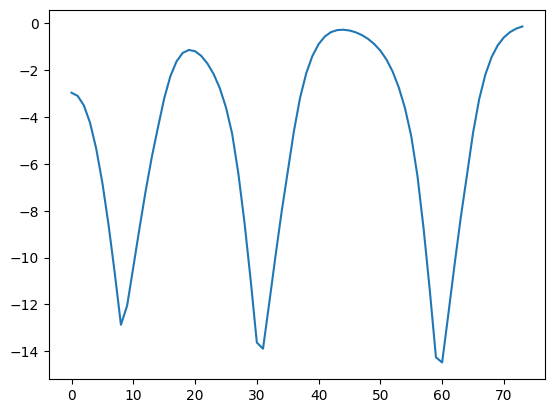

In [27]:
plt.plot(rewards)
plt.show()